<center>

#<b>CS353 ML Lab 8</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section 2
### Date: 30/03/2021
---
###Q: Implementation of <b>AND Gate using Artificial Neural Network</b>. To understand the working of neural networks using AND Gates implemented through neural network.
---
</center>

###<b>Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

###<b>Sigmoid Function 

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###<b>Initalizing Weights

In [3]:
# Weights are random values between 0 and 1 with bias value 1
def initializeParameters(input, HiddenLayers, output):
  
    W1 = np.random.randn(HiddenLayers, input)
    W2 = np.random.randn(output, HiddenLayers)
    b1 = np.zeros((HiddenLayers, 1))
    b2 = np.zeros((output, 1))
      
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    return parameters

###<b>Forward Propagation

In [4]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
  
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
  
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

###<b>Backward Propagation

In [5]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
      
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
      
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
      
    gradients = {"dZ2":dZ2, "dW2":dW2, "db2":db2, "dZ1":dZ1, "dW1":dW1, "db1":db1}
    return gradients

In [6]:
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters
  
# Model inputs for AND truth table 
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

###<b>Model Parameters

In [7]:
HiddenLayers = 2          # number of hidden layer neurons (2)
input = X.shape[0]        # number of input features (2)
output = Y.shape[0]       # number of output features (1)
parameters = initializeParameters(input, HiddenLayers, output)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

###<b>Results

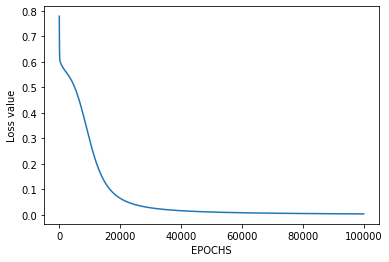

In [8]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

###<b>Predicting Values

In [9]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

[[0. 1. 0. 0.]]
